<a href="https://colab.research.google.com/github/Knightler/deep-learning/blob/main/SNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet norse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.6 MB/s et

In [2]:
import torch
import norse.torch as norse

# We set the random seed for reproducibility
_ = torch.manual_seed(0)

In [3]:
data = torch.randn(5)
data

tensor([ 1.5410, -0.2934, -2.1788,  0.5684, -1.0845])

In [4]:
network = torch.nn.Sequential(
    torch.nn.Linear(5, 1),
    torch.nn.ReLU()
)

In [5]:
network(data)

tensor([0.], grad_fn=<ReluBackward0>)

In [6]:
data = torch.randn(5)
network(data)

tensor([0.9020], grad_fn=<ReluBackward0>)

In [7]:
data = torch.randn(4, 5)
data

tensor([[ 1.4437,  0.2660,  0.1665,  0.8744,  0.9383],
        [ 0.4889, -0.6731,  0.8728,  1.0554,  0.1778],
        [-0.2303, -0.3918, -1.5810,  1.7066, -0.4462],
        [ 0.7440,  1.5210,  3.4105, -1.5312, -1.2341]])

In [14]:
network = norse.SequentialState(torch.nn.Linear(5, 1), norse.LIF())

In [15]:
network

SequentialState(
  (0): Linear(in_features=5, out_features=1, bias=True)
  (1): LIF(p=LIFParameters(tau_syn_inv=tensor(200.), tau_mem_inv=tensor(100.), v_leak=tensor(0.), v_th=tensor(1.), v_reset=tensor(0.), method='super', alpha=tensor(100.)), dt=0.001)
)

In [19]:
output, _ = network(data) # we ignore the state for now
output

tensor([[0.],
        [0.],
        [0.],
        [0.]], grad_fn=<StackBackward0>)



---



In [20]:
!pip install --quiet matplotlib git+https://github.com/norse/norse

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [21]:
import torch
import norse

In [22]:
torch.manual_seed(0)
data = torch.randn(8, 3, 28, 28)

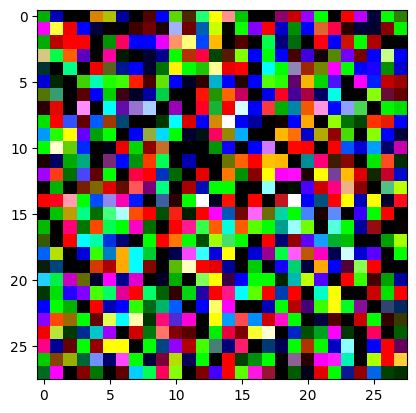

In [23]:
import matplotlib.pyplot as plt
plt.imshow(data[0].permute(1, 2, 0))

In [25]:
import torch.nn as nn
import norse.torch as norse

model = norse.SequentialState(
    nn.Conv2d(3, 6, 7, 1),
    norse.LIFCell(),
    nn.Conv2d(6, 12, 7, 1),
    norse.LIFCell(),
    nn.Flatten(1),
    nn.Linear(3072, 10, bias=False),
)

In [26]:
print(model)

SequentialState(
  (0): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1))
  (1): LIFCell(p=LIFParameters(tau_syn_inv=tensor(200.), tau_mem_inv=tensor(100.), v_leak=tensor(0.), v_th=tensor(1.), v_reset=tensor(0.), method='super', alpha=tensor(100.)), dt=0.001)
  (2): Conv2d(6, 12, kernel_size=(7, 7), stride=(1, 1))
  (3): LIFCell(p=LIFParameters(tau_syn_inv=tensor(200.), tau_mem_inv=tensor(100.), v_leak=tensor(0.), v_th=tensor(1.), v_reset=tensor(0.), method='super', alpha=tensor(100.)), dt=0.001)
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=3072, out_features=10, bias=False)
)


In [27]:
output, state = model(data)

In [33]:
output.shape

torch.Size([8, 10])

In [34]:
[x.__class__ for x in state]

[NoneType,
 norse.torch.functional.lif.LIFFeedForwardState,
 NoneType,
 norse.torch.functional.lif.LIFFeedForwardState,
 NoneType,
 NoneType]

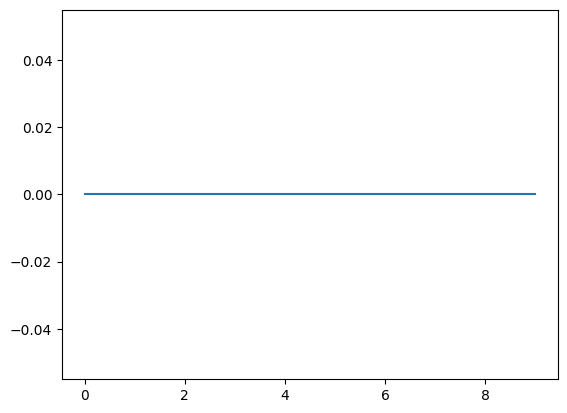

In [35]:
plt.plot(output.detach()[0])

In [36]:
timesteps = 32
output = None
state = None
for timestep in range(timesteps):
    output, state = model(data, state)

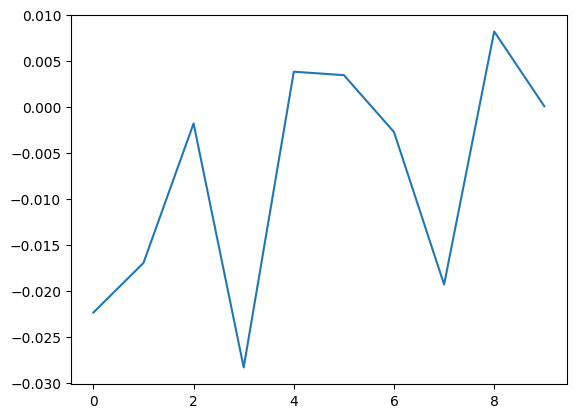

In [37]:
plt.plot(output.detach()[0])

In [38]:
actual_output = output.sum()
expected_output = 1
difference = expected_output - actual_output

In [40]:
optimizer = torch.optim.RMSprop(model.parameters())
difference.backward()
optimizer.step()

/usr/local/lib/python3.11/dist-packages/torch/utils/_cxx_pytree.py:238: UserWarning: PyTree type <class 'norse.torch.utils.pytree.LIFParameters'> is a subclass of `collections.namedtuple`, which is already registered in the global namespace. Override it with custom flatten/unflatten functions in namespace 'torch'.
  optree.register_pytree_node(
/usr/local/lib/python3.11/dist-packages/torch/utils/_cxx_pytree.py:238: UserWarning: PyTree type <class 'norse.torch.utils.pytree.LIFBoxParameters'> is a subclass of `collections.namedtuple`, which is already registered in the global namespace. Override it with custom flatten/unflatten functions in namespace 'torch'.
  optree.register_pytree_node(


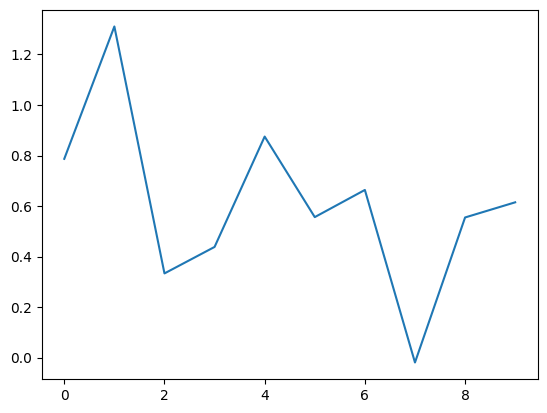

In [41]:
timesteps = 32
output = None
state = None
for timestep in range(timesteps):
    output, state = model(data, state)

plt.plot(output.detach()[0])



---



In [42]:
!pip install -q matplotlib numpy scipy tqdm git+https://github.com/norse/norse

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [44]:
import torch
from norse.torch.module.lif import LIF, LIFParameters

In [45]:
lif = LIF(record_states=True)
lif

LIF(p=LIFParameters(tau_syn_inv=tensor(200.), tau_mem_inv=tensor(100.), v_leak=tensor(0.), v_th=tensor(1.), v_reset=tensor(0.), method='super', alpha=tensor(100.)), dt=0.001)

In [50]:
data = torch.zeros(1000, 1)
data[100] = 1.0
data[120] = 1.0
output, states = lif(data)

Text(0, 0.5, 'Voltage')

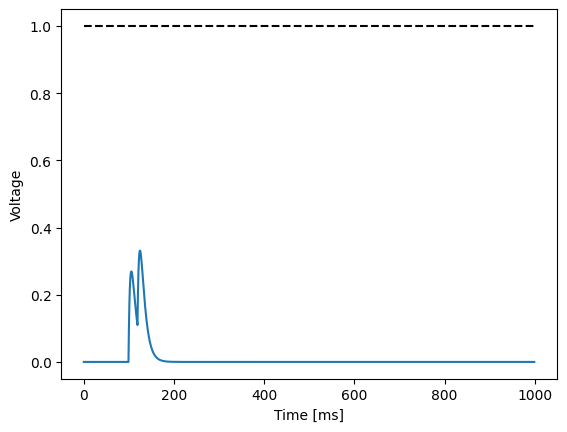

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(states.v.detach())
ax.hlines(y=1.0, xmin=0.0, xmax=1000, linestyle='--', color='k')
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Voltage')

In [53]:
voltages = states.v.detach()
max_voltage = torch.max(voltages)
f'maximal voltage: {max_voltage} at {torch.argmax(voltages)} ms'

'maximal voltage: 0.33088549971580505 at 125 ms'

Text(0, 0.5, 'Voltage')

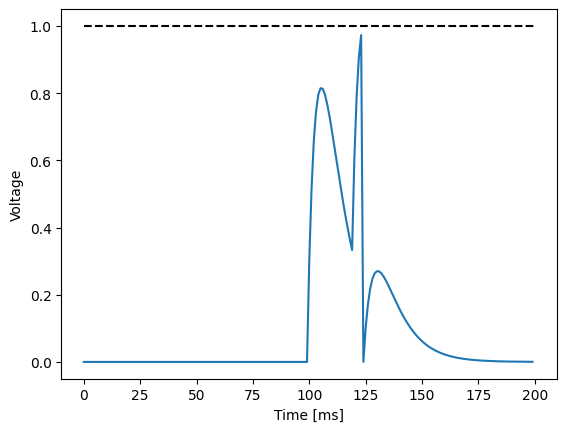

In [54]:
scaled_data = 1.001 * (
    data / max_voltage
)  # rescale data according to max voltage + some headroom just computed
output, states = lif(scaled_data[:200])

fig, ax = plt.subplots()
ax.plot(states.v.detach())
ax.hlines(y=1.0, xmin=0.0, xmax=200, linestyle="--", color="k")
ax.set_xlabel("Time [ms]")
ax.set_ylabel("Voltage")